#| label: intro

# Course material 7
## Lesson 8 (30.11.2023)

> Disclaimer: Material is taken from 
> 
> the "standard" CodeRefinery workshop:
> Introduction into Version Control
> 
> https://coderefinery.github.io/git-intro/

Note for the following text: When a code chunk starts with `$ ...` this simply indicates that we will type the following command into the Terminal (e.g., Git Bash).

Recap from last time:

+ create a new repository (in the following only "repo"):
    + go to the desired local path where you want to create your repo
    + create a folder with the desired name of your repo: `$ mkdir my-repo`
    + go into this folder: `$ cd my-repo`
    + create the empty Git repo with **main** as default branch: `$ git init -b main`
 
General recommended worflow:

+ `$ git status` check the status of files in your repo
+ `$ git add file.txt` add a new file to the list of files tracked by git (new files are not tracked automatically, you have to add them)
+ `$ git commit -m "adding file.txt"` commit the change to the repo with an informative message

Our current repo from last time is `example-project` whith the following folder structure:

- **data/**                : folder for saving the data downloaded from the internet
- **politeness_data.py**   : python script with PoliteData class
- **text.txt**             : created in order to test whether prefered text editor opens when typing `$ git commit` (without `-m "some message"`)

If you have missed this part:

+ create a folder in your target directory and go into it: `$ mkdir example-project` + `$ cd example-project`
+ create a new git repo: `$ git init -b main`
+ create a new folder in the folder example-project: `$ mkdir data`
+ download the python file politeness_data.py from the course website ([material lesson 8](https://buerkner-lab-teaching.github.io/python-intro/material/)) and save it in the example-project folder
+ open the file, change the PATH in line 164, save and close the file
+ create a new file in the folder example-project: `$ touch test.txt` 

## Next steps

+ open the file politeness_data.py in Spyder and run the entire file 
    + Note:
        + make sure you have indicated the correct PATH in the python file (see variable target_path below the class object) 
        + if you haven't installed the module `pyarrow` yet, you might get an error: install pyarrow via `$ pip install pyarrow`, then go back to Spyder, restart the Kernel (Consoles > Restart Kernel), and run the file again
+ check whether the data file has been downloaded:
    + go to the Terminal and enter the data folder `$ cd data`
    + list all files within the data folder `$ ls` (the file "pitch_data.csv" should be listed)
    + return to the example-project folder: `$ cd ..`

### Add a README file
+ create a new file: `$ touch README.md`
+ open the file - in Windows: `$ start README.md`, in Mac: `$ open README.md`
+ Type the following in the file, then save and close the README file

+ check current status of repo: `$ git status`
+ add the downloaded data file for tracking: `$ git add data/pitch_data.csv`
+ commit this change: `$ git commit -m "add pitch_data.csv"`

Do the same for the README file: 
+ `$ git add README.md`
+ `$ git commit -m "add README.md"`

Checkout again the status of your repo: 
+ `$ get status`
+ you should get as result "nothing to commit, working tree clean"

### Optional

+ see [https://coderefinery.github.io/installation/difftools/](https://coderefinery.github.io/installation/difftools/)
  
Mac-Users:
+ [Use Opendiff as default git difftool](https://borgs.cybrilla.com/tils/opendiff-as-difftool/)

Windows-Users:
+ download the .msi file *meld*: https://meldmerge.org/ (.msi)
+ install meld (run the downloaded .msi file)
+ configure git to open meld:
    +  `$ git config --global diff.tool meld`
    +  `$ git config --global mergetool.meld.path "C:\Programme\Meld\Meld.exe"` (Note: here you have to use the path where you locally installed meld)

+ let us check whether it worked:
    + open your README file and add the following content
        + `$ start README.md` 

+ save and close README.md
+ add and commit your changes:
    + `$ git add README.md`
    + `$ git commit -m "added minimal content structure to README"`
+ take a look at the commit history (using the summarized view)
    + `$ git log --oneline`
+ visualize all differences that have been made (tracked) since we added the README file 
    + `$ git difftool HASH` (Note: the HASH is the number that uniquely identifies a commit. You get it when you look into your commit history using `git log`. In my case, this is "2a3c28c", i.e., `$ git difftool 2a3c28c`)

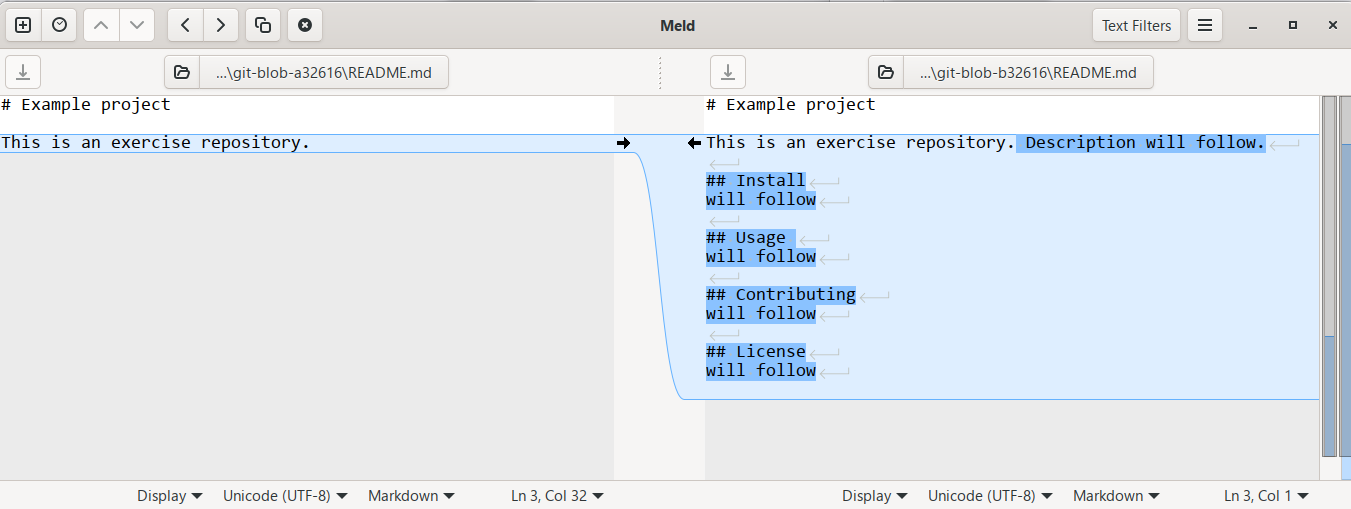

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "graphics/"
Image(filename = PATH + "git_difftool.png", width=600)

### Writing useful commit messages

+ Why something was changed is more important than what has changed.
+ Write in English and such that your future your will understand your message
+ References:
    + Blogpost on ["How to Write a Git Commit Message"](https://cbea.ms/git-commit/)
    + learn from reading others commit messages:
        + [Pandas](https://github.com/pandas-dev/pandas/commits/main)
        + [Julia](https://github.com/JuliaLang/julia/commits/master)
        + [ggplot2](https://github.com/tidyverse/ggplot2/commits/main)

## Ignoring files and paths with .gitignore

+ Should we add and track all files in a project?
+ Some files:
    + do not contrbute in any meaningful way (e.g. automatically generated files (e.g., .ipynb_checkpoints) 
    +  are too large (e.g., when you have a very large database)
    +  are rather for internal/local use

+ [Resource](https://git-scm.com/docs/gitignore) for more information on the .gitignore file

+ You can ignore files by creating a .gitignore file
    + create a new file in the example-project folder: `$ touch .gitignore`
    + open the file: `$ start .gitignore`
 
+ We can ignore 
    + files based on the file type, e.g. `*.html` (ignores html files)
        + when you want to ignore all html files except of one, then you can specify this exception, e.g. `!index.html` (does not ignore the file index.html)
    + specific files `/text.txt`
    + everything under a specific directory, e.g. `data/`

Let us ignore the data folder in the following:
+ type in your .gitignore file: `data/ `, save and close the .gitignore file

## Branching and merging

+ Up until now our repository had only one branch with one commit coming after the other
+ However, software development is often not linear:
    + We typically need at least one version of the code to “work” (to compile, to give expected results, …).
    + At the same time we work on new features, often several features concurrently. Often they are unfinished.
    + We need to be able to separate different lines of work really well.

+ The strength of version control is that it permits the researcher to isolate different tracks of work, which can later be merged to create a composite version that contains all changes:

<img src="https://coderefinery.github.io/git-intro/_images/git-collaborative.svg" width="400"/>

+ Main line development is often called `main` or `master`.
+ Other than this convention there is nothing special about main or master, it is a branch like any other.
+ A group of commits that create a single narrative are called a branch.

**git graph**
+ We will now define an alias in Git, to be able to nicely visualize branch structure in the terminal without having to remember a long Git command.
+ `$ git config --global alias.graph "log --all --graph --decorate --oneline"`

Let us inspect the project history using the git graph alias:
+ `$ git graph`
+ We have a couple commits and only one development line (branch) and this branch is called `main`
+ Branches are pointers that point to a commit.
+ Branch `main` points to a commit
+ `HEAD` is another pointer, it points to where we are right now (currently `main`)

Let’s create a branch called `experiment` where we change the politeness_data.py
+ `$ git branch experiment main`: creates branch "experiment" from "main"
+ `$ git branch`: list all local branches and show on which branch we are (currently main)
+ `$ git switch experiment`: switch to branch "experiment"
+ `$ git branch`: verify that we are on branch "experiment"

1. Change politeness_data.py by splitting the class in two classes:
    + DownloadData: sets working directory and downloads data set
    + PolitenessData: Preprocess and plot data
2. Remove the test.txt file
    + `$ rm test.txt`

Checkout current status of repo:
+ `$ git status`

Add the changes to git and commit it:
+ `$ git add politeness_data.py`
+ `$ git commit -m "Split class PolitenessData into PolitenessData and DownloadData"`
+ `$ git rm test.txt`
+ `$ git commit -m "removed test.txt used for testing editor setup, not needed anymore"`


Now, let's have again a look at the graph:
+ `$ git graph`

We see:
+ a couple of commits under the branch (experiment) and
+ a couple of commits under the branch (main)
+ the current active branch (where the HEAD points to) is "experiment"

It turned out that the idea to split our class was a good. Therefore we would like to merge the branch "experiment" into the "main" branch

First we make sure we are on the branch we wish to merge into:
+ `$ git branch` (get current branch: which is "experiment")
+ `$ git switch main` (switch to main in which we want to merge experiment)
+ `$ git merge experiment` (merge experiment into main)

Verify that everything worked:
+ `$ git graph`

What happens internally when you merge two branches is that Git creates a new commit, attempts to incorporate changes from both branches and records the state of all files in the new commit. While a regular commit has one parent, a merge commit has two (or more) parents.

Let us finally also add the .gitignore file 
+ `$ git add .gitignore`
+ `$ git commit -m "add .gitignore"`

### Deleting branches safely

We don't need the branch "experiment" anymore, therefore we can also delete it
+ `$ git graph` (have a look at the current graph)
+ `$ git branch -d experiment` (delete the experiment branch)
+ `$ git graph` (see changes in the updated graph)

## Tags

+ A tag is a pointer to a commit but in contrast to a branch it does not ever move when creating new commits later.
+ We use tags to record particular states or milestones of a project at a given point in time, like for instance versions
+ There are two basic types of tags: annotated and lightweight
+ Use **annotated tags** since they contain the author and can be cryptographically signed using GPG, timestamped, and a message attached.

Let’s add an annotated tag to our current state of the example project:
+ `git tag -a first-git-project -m "My first git project"`

Have a look at the git graph (`$ git graph`), we see that the last commit has a `tag` attached to it

For example, when you now make several changes and you want to compare what has been changed since this point, you can type:
+ `$ git difftool first-git-project` (thus the tag acts like a HASH)

## Summary
### Basics
+ `$ git init -b main`  # initialize new repository (main is default branch)
+ `$ git add`          # add files or stage file(s)
+ `$ git commit`        # commit staged file(s)
+ `$ git status`        # see what is going on
+ `$ git log`           # see history
+ `$ git diff`          # show unstaged/uncommitted modifications
+ `$ git show`          # show the change for a specific commit
+ `$ git mv`            # move/rename tracked files
+ `$ git rm`            # remove tracked files

### Working wir branches

+ `$ git branch`               # see where we are
+ `$ git branch NAME`          # create branch NAME
+ `$ git switch NAME`          # switch to branch NAME
+ `$ git merge NAME`           # merge branch NAME (to current branch)
+ `$ git branch -d NAME`       # delete branch NAME
+ `$ git branch -D NAME`       # delete unmerged branch NAME

You can also create a new branch and switch to it simultaneously:
+ `$ git switch --create NAME`  # create branch NAME and switch to it

## Typical Workflows

+ `$ git switch --create new-feature`  # create branch, switch to it
+ `$ git commit`                       # work, work, work, ..., and test
+ `$ git switch main`                  # once feature is ready, switch to main
+ `$ git merge new-feature`            # merge work to main
+ `$ git branch -d new-feature`        # remove branch

## Conflict resolution
Sometimes the same portion of the code/text is modified on two branches in two different ways and Git issues a conflict. Then you need to tell Git which version to keep (resolve it).

### Preparing a conflict
+ create two branches from main: ignore-data, consider-data
    + `$ git branch ignore-data main`
    + `$ git branch consider-data main`

+ go to the branch consider-data, open the file .gitignore, and delete the line "data/"; save and close the file
    + `$ git switch consider-data`
    + `$ start .gitignore`
    + `$ git add .gitignore`
    + `$ git commit -m "remove data/ from gitignore"`
      
+ go the branch ignore-data
    + `$ git switch ignore-data`
    + open the gitignore file and add the line: politeness_data.py
        + `$ start .gitignore` 
+ save the file, add and commit it
    + `$ git add .gitgnore`
    + `$ gig commit -m "add politeness_data.py to gitignore`  

### Merging conflict changes
+ go to the main branch and merge first ignore-data into it and then the branch consider-data:
    + `$ git switch main`
    + `$ git merge ignore-data` (works fine)
    + `$ git merge consider-data` (we get a conflict)

As git failed in merging the last branch into main, we can see that there is still an unchanged commit (which would have been autmatically committed given successful merging)
+ `git status`

Git won’t decide which to take and we need to decide. Observe how Git gives us clear instructions on how to move forward.

Let us inspect the conflicting file:

+ `$ git diff`

`$ git diff` shows now only the conflicting part and nothing else

Let us open the .gitignore file
+ `$ start .gitignore`

You will see that git inserted **resolution markers** within the file.
Resolution markers are the following markers: `<<<<<<<`, `>>>>>>>`, and `=======`.

+ edit the code/text between the resolution markers
+ in this case we remove the politeness_data.py from the gitignore
+ Remove the resolution markers

The file should now have only one line including "data/":

+ save and close the file
+ add the updates to git
    + `$ git add .gitignore`
+ checkout the current status of your repo
    + `$ git status`
+ you should now get the following message: 

+ commit the changes (here we do not need any message) 
    + `$ git commit`
+ have look at the commit history
    + `$ git graph`
+ You should see now that the branches are indeed merged together.
+ Finally we can delete the branches ignore-data and consider-data
    + `$ git branch -d consider-data`
    + `$ git branch -d ignore-data`
+ check whether deleting was sucessfull by listing all your branches
    + `$ git branch`
+ You should only see the "main" branch listed 

## Summary / Steps to resolve a conflict

+ Check status with `$ git status` and `$ git diff`.
+ Decide what you keep (the one, the other, or both or something else). Edit the file to do this.
    + Remove the resolution markers, if not already done.
    + The file(s) should now look exactly how you want them.
+ Check status with `$ git status` and `$ git diff`.
+ Tell Git that you have resolved the conflict with `$ git add <file>` 
+ Verify the result with `$ git status`.
+ Finally commit the merge with only `$ git commit`. Everything is pre-filled.


## Sharing repositories online

Our goal is to publish our example-project on the web. Don’t worry, you will be able to remove it afterwards.

To store your git data on another server, we will use GitHub. We can push changes to GitHub and pull from it.

You might use GitHub to:
+ Back up your own work.
+ To collaborate with other people.

### Authenticating to GitHub: SSH or HTTPS?

How does Github know who you are? This is hard and there are two options.
+ SSH is the classic method, using Secure Shell remote connection keys.
+ HTTPS works with the Git Credential Manager, which is an extra add-on that works easily in Windows and Mac.

Try the following command:
+ `$ ssh -T git@github.com`

If it returns Hi USERNAME! You've successfully authenticated, ..., then SSH is configured and the following steps will work with the SSH cloning.

Next, try the following command:
+ `$ git config --get credential.helper`

If this shows something, then the credential manager is probably configured and HTTPS cloning will work (but you can’t verify it until you try using it). If HTTPS works for you, you should always select HTTPS as the clone URL from Github.

### Publishing an existing repository from laptop to GitHub

+ First log in to GitHub
+ create a new repository

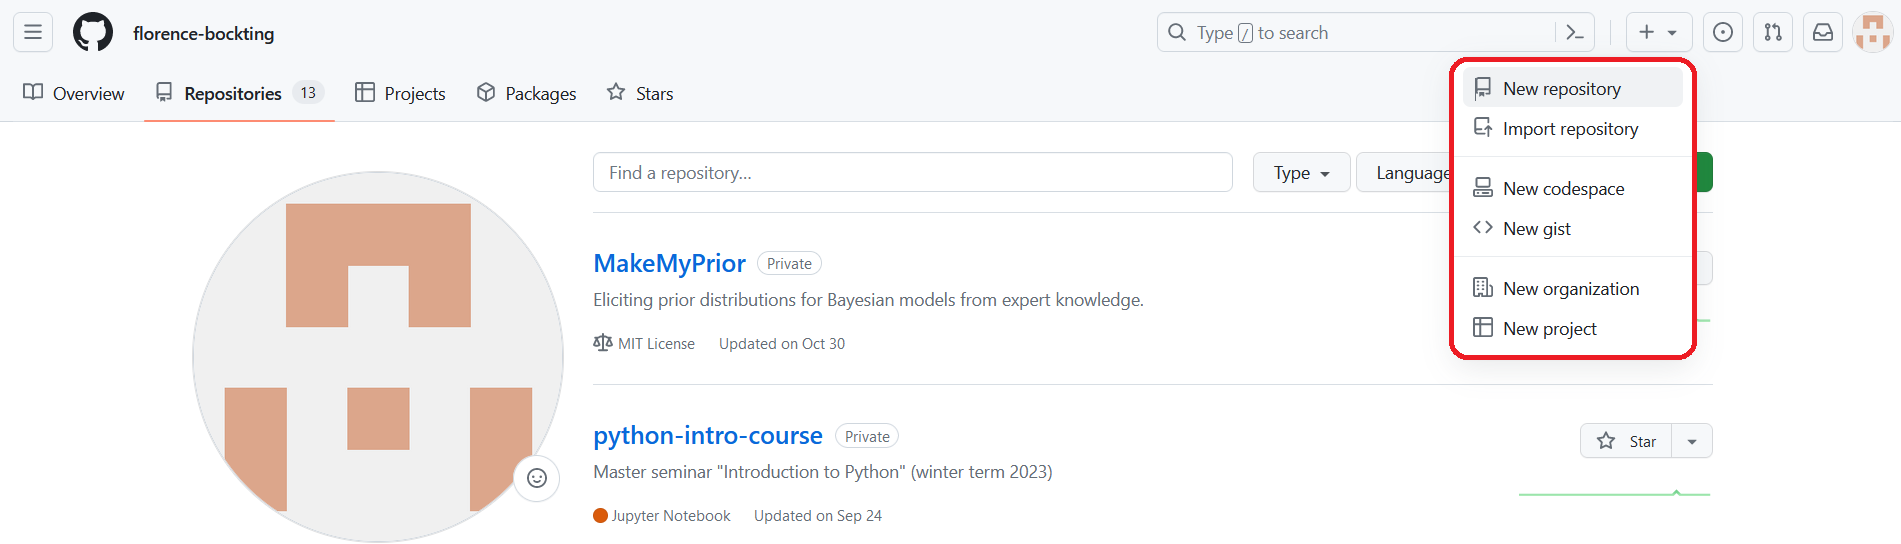

In [4]:
Image(filename = PATH + "git_new_repo.png", width=800)

+ Choose a repository name, add a short description and “Create repository”.

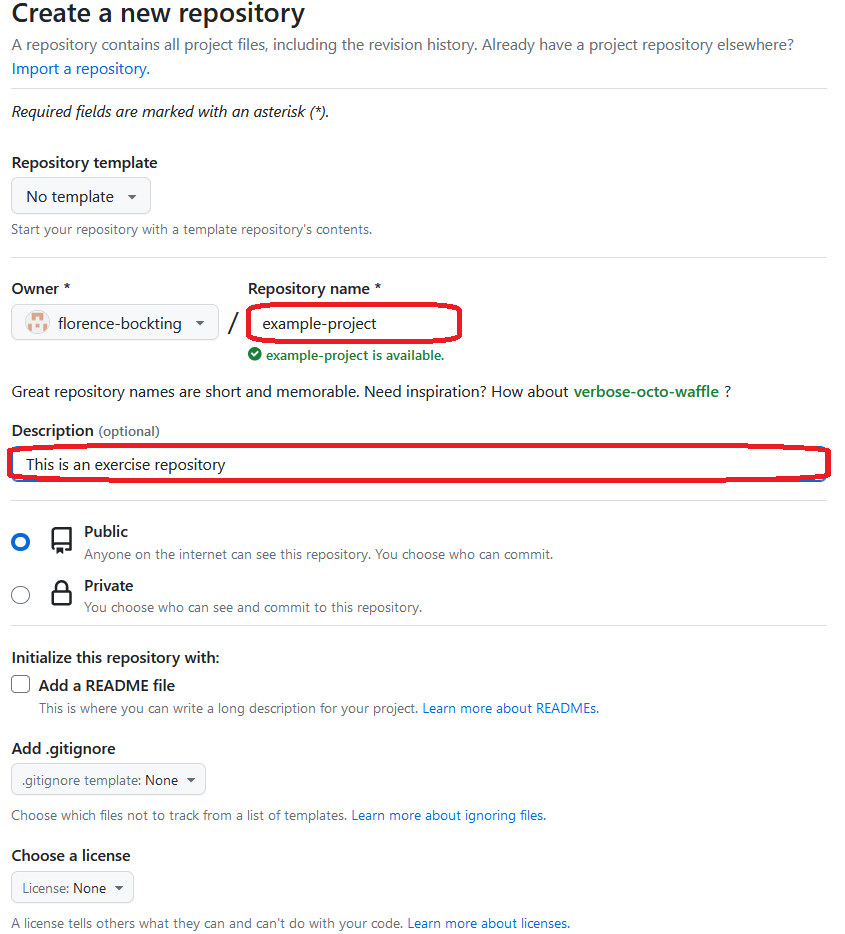

In [10]:
Image(filename = PATH + "git_new_repo2.png", width=500)

+ We have now an empty project with either an HTTPS or an SSH address: click on the HTTPS and SSH buttons to see what happens.
+ We now want to follow the "… or push an existing repository from the command line":
    + Now go to your example-project on your computer.
    + Check that you are in the right place with `$ git status`.
    + Copy paste the three lines to the terminal and execute those, in my case (you need to replace the “USER” part and possibly also the repository name):
        + `$ git remote add origin https://github.com/florence-bockting/example-project.git` (add a remote reference with the name "origin")
        + `$ git branch -M main` ("rename current branch to "main")
        + `$ git push -u origin main` (push branch "main" to "origin")

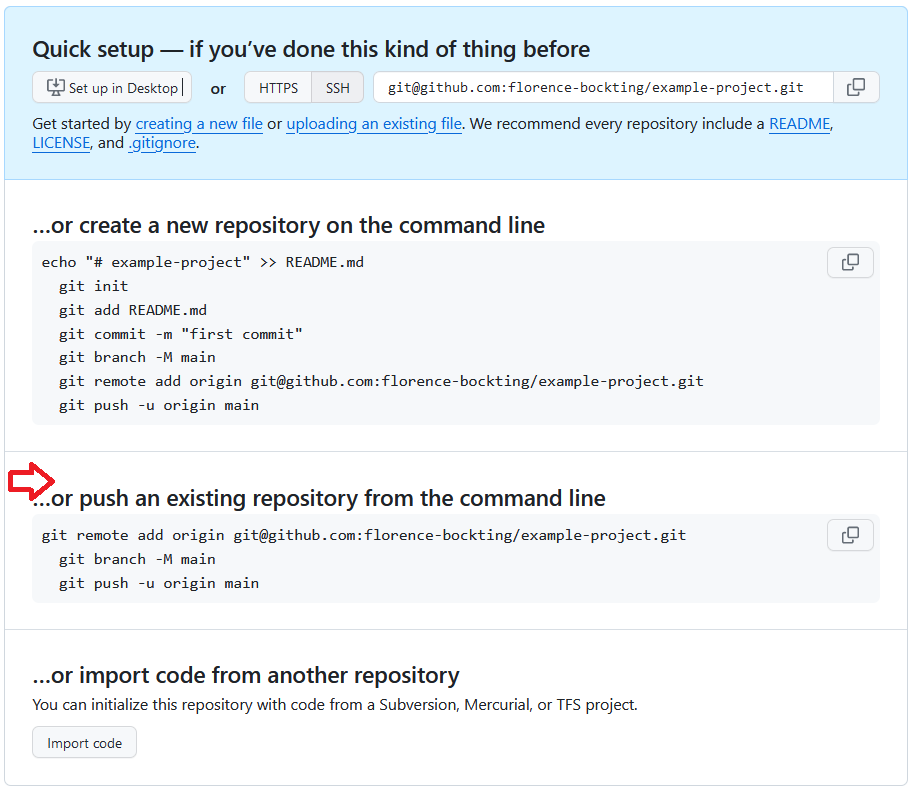

In [7]:
Image(filename = PATH + "git_new_repo3.png", width=500)

You should now see something similar to the following:

+ Reload your GitHub project website and your commits should now be online

You can inspect your githistory using further tools:
+ click on politeness_data.py
+ replace in the URL github.com with github.githistory.xyz (e.g., https://github.githistory.xyz/florence-bockting/example-project/blob/main/politeness_data.py)
+ now you can inspect the history of that file

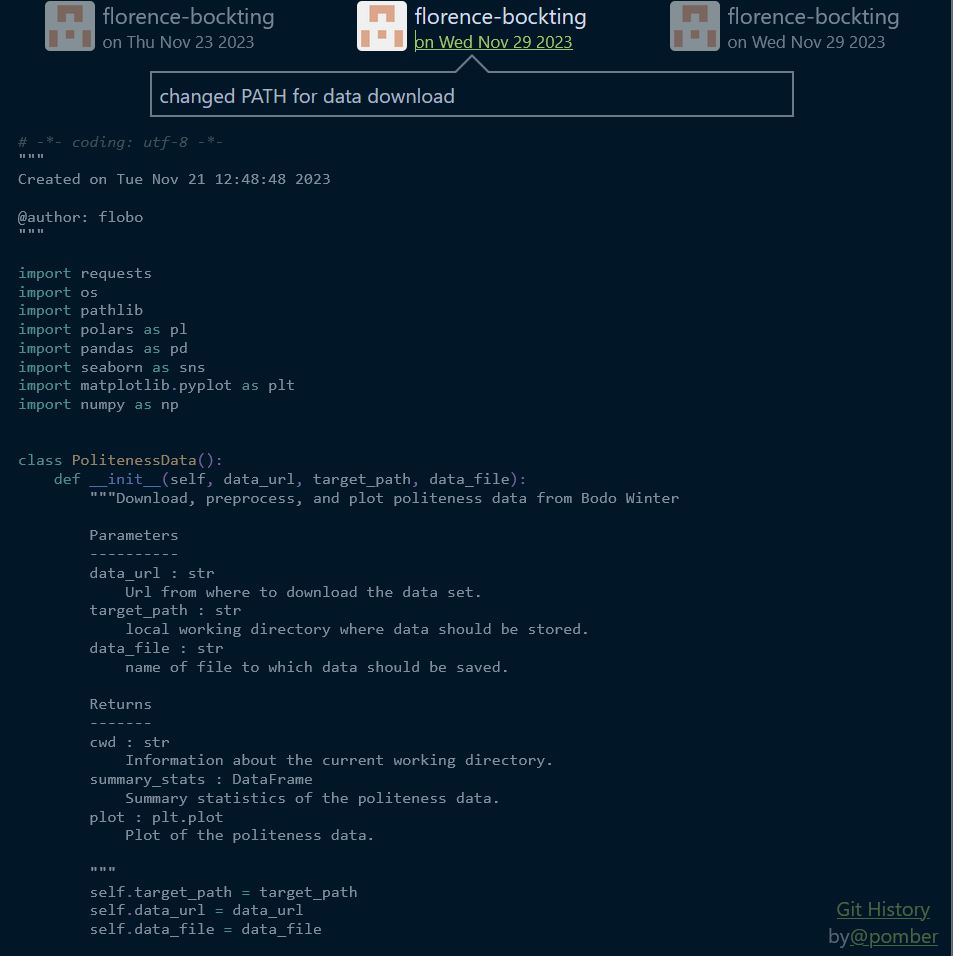

In [9]:
Image(filename = PATH + "git_history.png", width=500)

### Add a license to your repo
+ The license lets people know whether they can reuse your code and under what terms
+ Your license file should typically be called LICENSE.txt 
+ See [GitHub’s advice on how to choose a license](https://choosealicense.com/)
    + Let's choose the MIT License
    + Copy the license text
    + create a new file in your repo called "LICENSE.txt" and open it
        + `$ touch LICENSE.txt`
        + `$ start LICENSE.txt`
    + Paste the license text and substitute [year] and [fullname] correspondingly
    + save and close the file

+ check whether there is new information to **pull** from your Github account
    + `$ git pull` 
+ check status of your git repo
    + `$ git status` 
+ add and commit changes
    + `$ git add LICENSE.txt`
    + `$ git commit -m "add license file"`
+ check again status of your git repo
    + `$ git status`  
+ if everything is up-to-date you can also update your Github repo, you need to **push** the updated information to it.
    + `$ git push`
+ you should now see the LICENSE.txt in your Github repo

+ Let us finally also update the README file
    + make sure your local repo is up-to-date with your online repo
        + `$ git pull`
    + open your README
        + `$ start README.md`
        + add in the LICENSE section the following sentence: "The content of this site is licensed under the MIT License"
        + save and close the file
    + add and commit your changes
        + `git add README.md`
        + `git commit -m "update license information in readme"`
    + checkout the status of your git repo
        + `git status`
    + if everything is up to date you can push the updates to your Github repo
        + `git push`
    + reload your Github repo and verify the updates in the README file  